In [1]:
from notion2pandas import Notion2PandasClient
import sys
sys.path.append('../../')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime
import constants 

n2p = Notion2PandasClient(auth=constants.NOTION_TOKEN)
notion_df = n2p.from_notion_DB_to_dataframe(constants.NOTION_DB_ID)


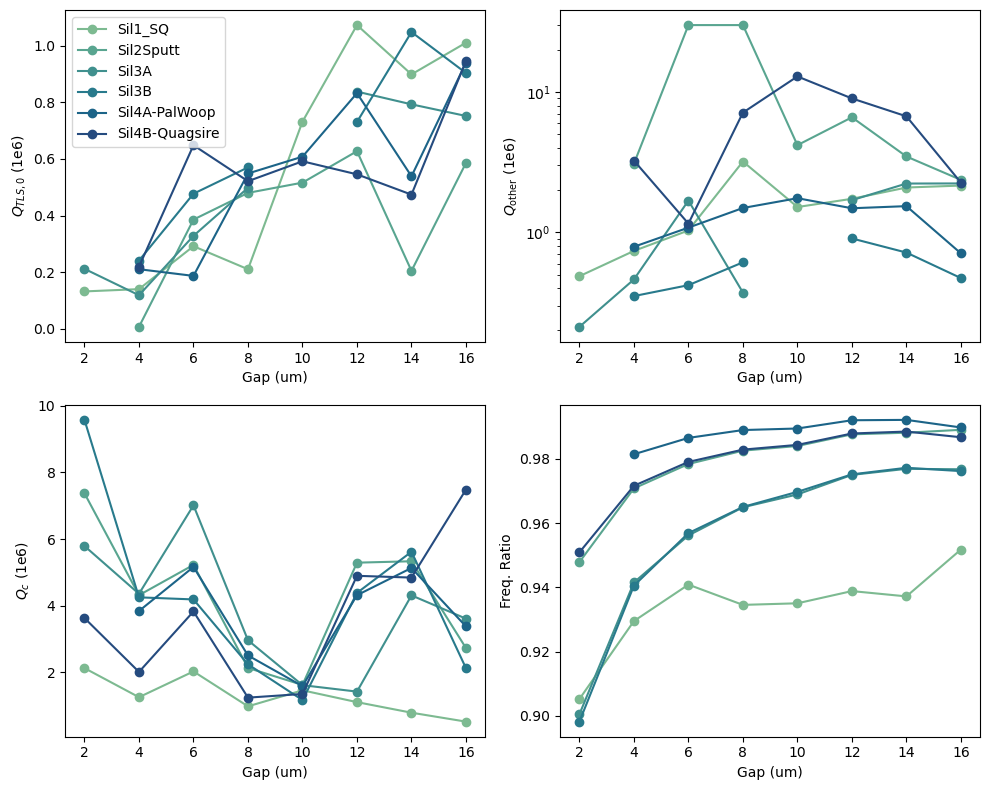

In [14]:

colors = ["#0869c8","#b51d14", '#ddb310','#658b38','#7e1e9c', '#75bbfd', '#cacaca']
sns.set_palette(sns.color_palette(colors))

fig, ax = plt.subplots(2,2, figsize=(10,8))
ax = ax.flatten()
xval = 'Gap (um)'
#xval = 'Target Freq. (GHz)'
num_sapp = 3
num_sil = 6
b1 = sns.color_palette('flare',num_sapp)
b2 = sns.color_palette('crest',num_sil)
col = b1+b2
i=0
num_sets = len(notion_df['Name'].unique())
for name, group in notion_df.groupby('Name'):
    if group['Substrate'].iloc[0]=='Silicon':
        group = group.sort_values(by=xval)
        #print(f"Group: {name}")
        #print(group['Gap (um)'])
        ax[0].plot(group[xval], group['QTLS0 (1e6)'], 'o-', label=name, color=col[i])
        ax[1].semilogy(group[xval], group['Qother (1e6)'], 'o-', label=name, color=col[i])
        ax[2].plot(group[xval], group['Qc (1e6)'], 'o-', label=name, color=col[i])
        ax[3].plot(group[xval], group['Freq (GHz)']/group['Target Freq. (GHz)'], 'o-', label=name, color=col[i])
        #ax[3].plot(group[xval], group['Freq (GHz)'], 'o-', label=name) 
    i+=1
ax[0].legend()
ax[0].set_ylabel('$Q_{TLS,0}$ (1e6)')
ax[1].set_ylabel('$Q_{\mathrm{other}}$ (1e6)')
ax[2].set_ylabel('$Q_{c}$ (1e6)')
ax[3].set_ylabel('Freq. Ratio')
for a in ax: 
    a.set_xlabel(xval)
fig.tight_layout()
current_time = datetime.now().strftime("%Y%m%d_%H%M%S")
fig.savefig(f"resonators_{current_time}.png")

In [8]:
group

,Gap (um),Target Freq. (GHz),Qother (1e6),Measurement,Notes,Freq (GHz),Package,Qother err (1e6),Qc err (1e6),Samples,...,Fridge Cool Down,Depo,QTLS0 err (1e6),Qc (1e6),Date,Metal,Substrate,Name,PageID,Row_Hash
31,16,6.7,0.3480,VNA,HF,6.723181,SLab,0.0160,0.0003,[],...,[],KJL2,0.2615,0.3110,"{'start': '2024-07-29', 'end': None, 'time_zon...",Nb,Sapphire,Sapp1_HF,1528a47d-7220-81ee-a068-ef3a2e334d9a,2877134378479512265
32,14,6.5,NaN,VNA,HF,6.423086,SLab,NaN,0.0039,[],...,[],KJL2,NaN,1.6472,"{'start': '2024-07-29', 'end': None, 'time_zon...",Nb,Sapphire,Sapp1_HF,1528a47d-7220-810b-8231-cb85e1f592f2,7129900430538456950
33,12,6.2,1.4169,VNA,HF,6.136373,SLab,0.6241,0.0049,[],...,[],KJL2,0.5710,2.6021,"{'start': '2024-07-29', 'end': None, 'time_zon...",Nb,Sapphire,Sapp1_HF,1528a47d-7220-817c-a239-efd6d409d0f7,-6579327870265671333
34,10,5.9,0.6846,VNA,HF,5.816871,SLab,0.0227,0.0017,[],...,[],KJL2,0.2225,1.3845,"{'start': '2024-07-29', 'end': None, 'time_zon...",Nb,Sapphire,Sapp1_HF,1528a47d-7220-81ee-bf88-c810ac5d25ee,-3441153755219472076
35,8,7.9,30.0000,VNA,HF,7.785142,SLab,106.9697,0.0113,[],...,[],KJL2,0.1207,2.0217,"{'start': '2024-07-29', 'end': None, 'time_zon...",Nb,Sapphire,Sapp1_HF,1528a47d-7220-819c-8b57-f194cda99b9b,7730843829846039603
36,6,7.5,30.0000,VNA,HF,7.447058,SLab,242.4101,0.0112,[],...,[],KJL2,0.2231,1.8499,"{'start': '2024-07-29', 'end': None, 'time_zon...",Nb,Sapphire,Sapp1_HF,1528a47d-7220-81fa-848c-d98a5ef599ed,-1847363519698572285
37,4,7.2,30.0000,VNA,HF,7.063647,SLab,163.1947,0.0100,[],...,[],KJL2,0.1582,1.7550,"{'start': '2024-07-29', 'end': None, 'time_zon...",Nb,Sapphire,Sapp1_HF,1528a47d-7220-81df-849e-d2aa7e12c995,-3216693689671512270
38,2,7.0,30.0000,VNA,HF,6.711793,SLab,63.5553,0.0469,[],...,[],KJL2,0.0275,3.5375,"{'start': '2024-07-29', 'end': None, 'time_zon...",Nb,Sapphire,Sapp1_HF,1528a47d-7220-81e6-83ca-d429f7b37627,-8902376100379909974


In [ ]:
group['Substrate'].iloc[0]=='Silicon'

'Sapphire'